# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.metrics import confusion_matrix, classification_report



## Data Preprocessing

### Training Image preprocessing

In [20]:
import tensorflow as tf

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 16775 files belonging to 9 classes.


### Validation Image Preprocessing

In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4194 files belonging to 9 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [22]:
num_classes = len(training_set.class_names)
print(f"Number of classes: {num_classes}")


Number of classes: 9


## Building Model

In [23]:
model = tf.keras.models.Sequential()

### Building Convolution Layer

In [24]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
model.add(tf.keras.layers.Dropout(0.25))

In [30]:
model.add(tf.keras.layers.Flatten())

In [31]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [32]:
model.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [33]:
#Output Layer
model.add(tf.keras.layers.Dense(units=9,activation='softmax'))

### Compiling and Training Phase

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │          13,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,799,233 (29.75 MB)

 Trainable params: 7,799,233 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:

training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1449s 3s/step - accuracy: 0.5598 - loss: 1.2505 - val_accuracy: 0.9173 - val_loss: 0.2390
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1311s 2s/step - accuracy: 0.9180 - loss: 0.2284 - val_accuracy: 0.9549 - val_loss: 0.1244
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1134s 2s/step - accuracy: 0.9515 - loss: 0.1471 - val_accuracy: 0.9714 - val_loss: 0.0805
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1137s 2s/step - accuracy: 0.9693 - loss: 0.0936 - val_accuracy: 0.9790 - val_loss: 0.0585
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1159s 2s/step - accuracy: 0.9724 - loss: 0.0803 - val_accuracy: 0.9459 - val_loss: 0.1585
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1149s 2s/step - accuracy: 0.9779 - loss: 0.0668 - val_accuracy: 0.9886 - val_loss: 0.0376
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1341s 3s/step - accuracy: 0.9786 - loss: 0.0608 - val_accuracy: 0.9857 - val_loss: 0.0389
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 1407s 3s/step - accuracy: 0.9897 - loss: 0.0298 - 

## Evaluating Model

In [37]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

525/525 ━━━━━━━━━━━━━━━━━━━━ 291s 554ms/step - accuracy: 0.9887 - loss: 0.0388
Training accuracy: 0.9895678162574768


In [38]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 417ms/step - accuracy: 0.9830 - loss: 0.0612
Validation accuracy: 0.9816404581069946


In [39]:
tf.keras.models.save_model(model, 'trained_model.keras')


### Saving Model

In [40]:

model.save("trained_model.h5")

In [41]:
model.save("trained_plant_disease_model.keras")


In [42]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7487332224845886,
  0.9257824420928955,
  0.9563040137290955,
  0.9756780862808228,
  0.9777645468711853,
  0.9806855320930481,
  0.9809836149215698,
  0.985633373260498,
  0.9927868843078613,
  0.9884351491928101],
 'loss': [0.7026569247245789,
  0.21008123457431793,
  0.13322840631008148,
  0.07631638646125793,
  0.06832076609134674,
  0.0582411102950573,
  0.054634567350149155,
  0.04144367203116417,
  0.025986790657043457,
  0.036971282213926315],
 'val_accuracy': [0.9172627329826355,
  0.954935610294342,
  0.9713876843452454,
  0.9790176153182983,
  0.9458750486373901,
  0.9885550737380981,
  0.9856938719749451,
  0.9604196548461914,
  0.9907010197639465,
  0.9816404581069946],
 'val_loss': [0.2389831840991974,
  0.12441801279783249,
  0.08053960651159286,
  0.058470532298088074,
  0.1585402488708496,
  0.03760053589940071,
  0.03892425447702408,
  0.1382155418395996,
  0.02904762700200081,
  0.06100226938724518]}

In [43]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [44]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

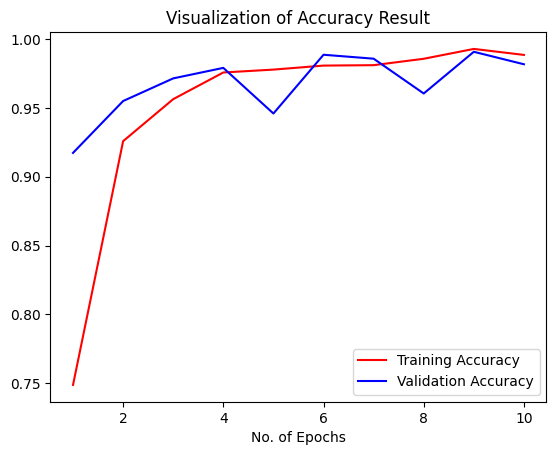

In [45]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [46]:
class_name = validation_set.class_names

In [47]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4194 files belonging to 9 classes.


In [48]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

4194/4194 ━━━━━━━━━━━━━━━━━━━━ 170s 40ms/step


In [49]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [50]:
Y_true

<tf.Tensor: shape=(4194,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [51]:
predicted_categories

<tf.Tensor: shape=(4194,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [53]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                          precision    recall  f1-score   support

                      Apple___Apple_scab       0.95      0.99      0.97       504
                Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                         Apple___healthy       0.99      0.97      0.98       502
Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
       Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
             Corn_(maize)___Common_rust_       1.00      0.97      0.99       477
                  Corn_(maize)___healthy       0.99      1.00      0.99       465
            Tomato___Tomato_mosaic_virus       1.00      0.98      0.99       448
                        Tomato___healthy       0.96      1.00      0.98       481

                                accuracy                           0.98      4194
                               macro avg       0.98      0.98      0.98      4194
              

### Confusion Matrix Visualization

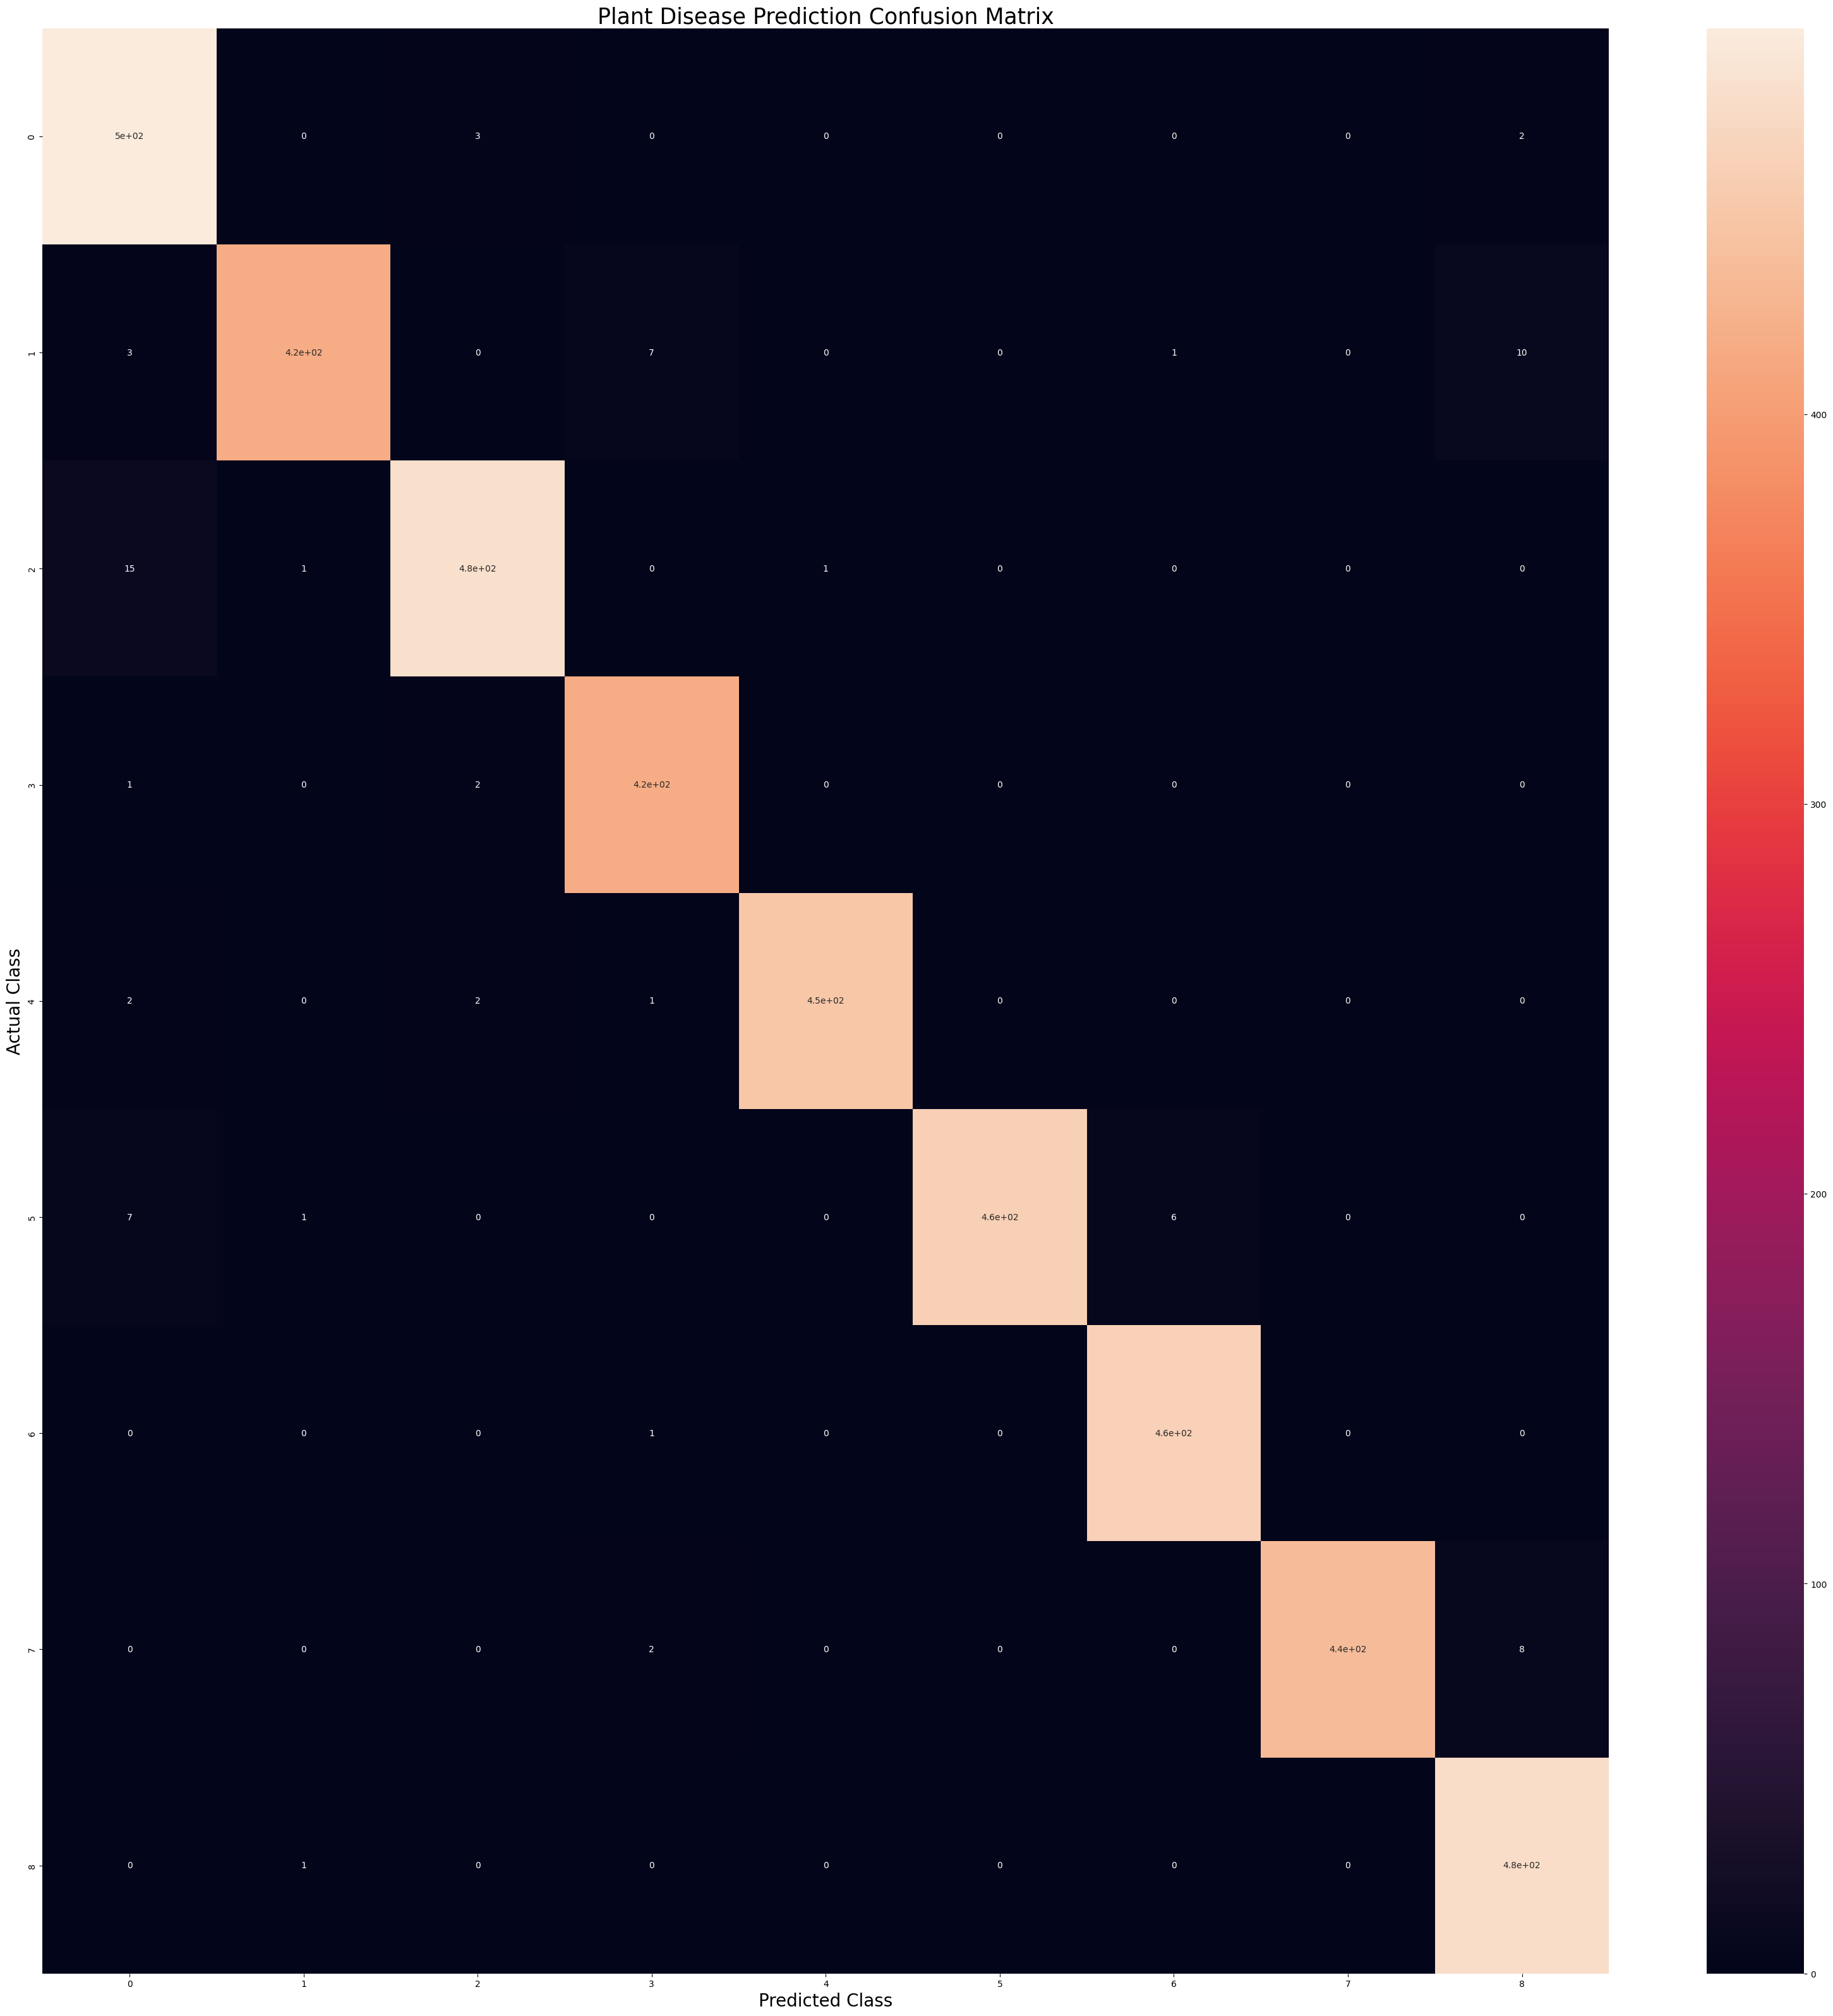

In [54]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()